### **Workation Price Prediction Challenge**

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

Dataset Description:



*   Train.csv - 21000 rows x 15 columns (Includes Per Person Price Column as Target variable)
*   Test.csv - 9000 rows x 14 columns (Doesn't include the Target Variable)
*   Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission


Attributes:

    Uniq Id - Unique Identifier per row sample
    Package Name - Name of the tour package
    Package Type - Type of the tour package
    Destination - A destination place
    Itinerary - complete itinerary
    Places Covered - covered places in the itinerary
    Travel Date - Date of travel
    Hotel Details - Details of the hotel stay
    Start City - Start place for the travel
    Airline - Flight details
    Flight Stops - Intermediate stops if any
    Meals - Inflight meals or services
    Sightseeing Places Covered - Itinerary details regarding sightseeing
    Cancellation Rules - Cancellation policy as per travel company
    Per Person Price - Price of the tour package per person (Target Column)




## **Evaluation metric**

The submission will be evaluated using the RMSLE metric. One can use np.sqrt(mean_squared_log_error(actual, predicted)) to calculate the same

In [ ]:

# General
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline



import os
from functools import partial
from scipy.optimize import fmin as scip_fmin
from tqdm import tqdm
import statistics
import tempfile

# Visialisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(style="whitegrid")
from PIL import Image

# Machine Learning
# Utils
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, train_test_split, KFold
from sklearn import preprocessing
#import category_encoders as ce
from imblearn.pipeline import Pipeline as imb_pipe
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import impute
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import base
#Feature Selection
from sklearn.feature_selection import chi2, f_classif, f_regression, mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile, VarianceThreshold
from sklearn.decomposition import TruncatedSVD
# Models


from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
#from catboost import CatBoostClassifier


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
#Metrics

from sklearn.metrics import mean_squared_log_error
from scipy.stats import norm
from scipy import stats
import re

import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

plt.rcParams['figure.figsize'] = [15, 4]
plt.style.use("fivethirtyeight")

pd.options.display.max_rows=1000
import warnings
warnings.simplefilter('ignore')


In [ ]:
!pip install catboost --q 

In [ ]:
# Load Data set

def get_data():
   
    train_set = pd.read_csv('/content/Train.csv')
    test_set = pd.read_csv('/content/Test.csv')
    sample_set = pd.read_csv('/content/sample submission.csv')

    return train_set,test_set,sample_set

In [ ]:
# Load data set

train_set,test_set, sample_set = get_data()


In [ ]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     21000 non-null  object 
 1   Package Name                21000 non-null  object 
 2   Package Type                21000 non-null  object 
 3   Destination                 21000 non-null  object 
 4   Itinerary                   21000 non-null  object 
 5   Places Covered              21000 non-null  object 
 6   Travel Date                 21000 non-null  object 
 7   Hotel Details               21000 non-null  object 
 8   Start City                  21000 non-null  object 
 9   Airline                     21000 non-null  object 
 10  Flight Stops                21000 non-null  int64  
 11  Meals                       21000 non-null  int64  
 12  Sightseeing Places Covered  21000 non-null  object 
 13  Cancellation Rules          210

In [ ]:
# drop na
#train_set.dropna(inplace=True)

In [ ]:
target = 'Per Person Price'
print(f"train data :{train_set.shape}\n test data {test_set.shape}")

train data :(21000, 15)
 test data (9000, 14)


In [ ]:
# utiliti funtion

def box_plot(df,col):
  ''' plot box plot with target'''
  sns.boxplot(col,target,data=df)


def sumof(df):
   return sum(map(int,df))

### **Target**

Per Person Price skew: 2.5601007661713506
Per Person Price kurtosis: 15.496354180962374


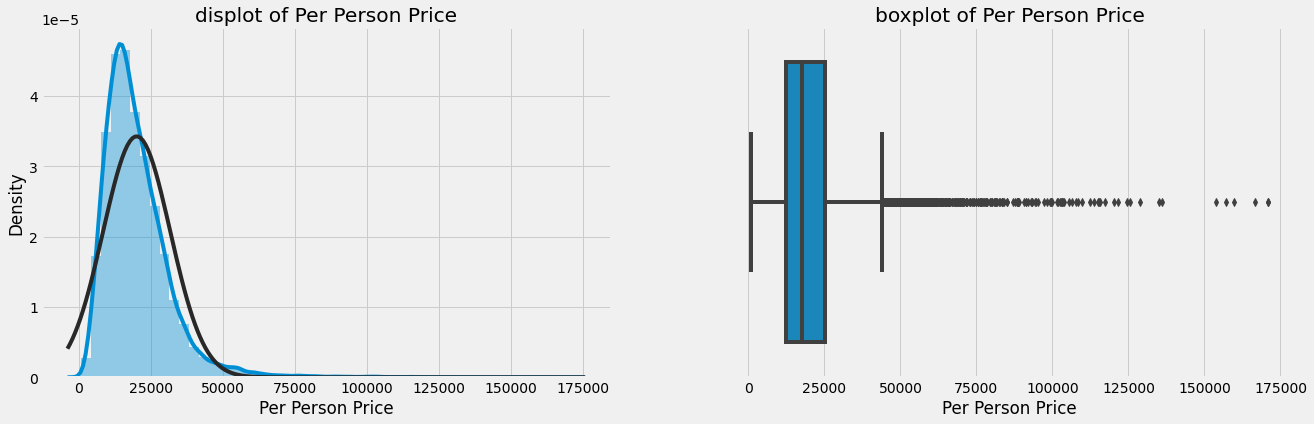

In [ ]:
plt.rcParams['figure.figsize'] = [20, 6]

plt.subplot(1,2,1)
sns.distplot(train_set[target],fit=norm)
plt.title(f"displot of {target}")

plt.subplot(1,2,2)
sns.boxplot((train_set[target]))
plt.title(f"boxplot of {target}")

print(f"{target} skew: {train_set[target].skew()}")
print(f"{target} kurtosis: {train_set[target].kurtosis()}")


In [ ]:
train_set = train_set[train_set[target] < 150000]

In [ ]:
train_set[target].describe()

count     20994.000000
mean      20018.418429
std       11390.425887
min         791.000000
25%       12460.250000
50%       17763.250000
75%       25073.250000
max      136155.500000
Name: Per Person Price, dtype: float64

((array([-3.99014903, -3.77457435, -3.6566381 , ...,  3.6566381 ,
          3.77457435,  3.99014903]),
  array([   791. ,   1198. ,   1225. , ..., 128880.5, 134981. , 136155.5])),
 (10545.436568867952, 20018.418429074976, 0.9256686651213378))

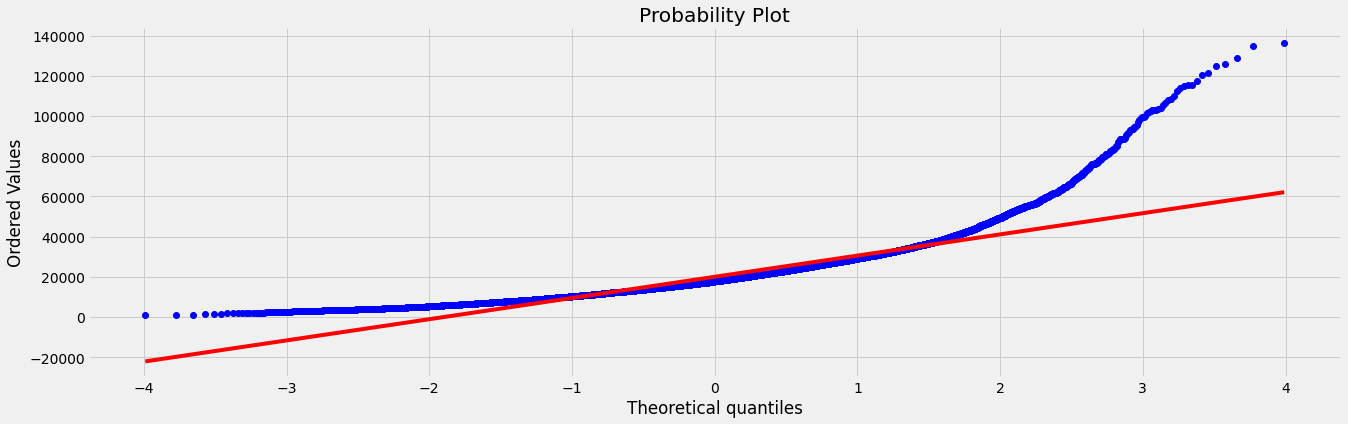

In [ ]:
plt.show()
stats.probplot(train_set[target],plot= plt )

**Target analysis**

*   Target is positive skewed and outliers are toward right
*   Can be corrected using log transform



log Per Person Price skew: -0.24931944903776823
log Per Person Price kurtosis: 0.5682252272248651


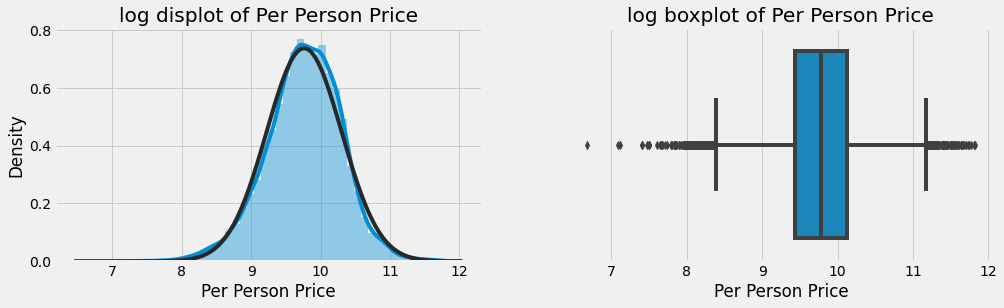

In [ ]:
#log

plt.rcParams['figure.figsize'] = [15, 4]
plt.subplot(1,2,1)
sns.distplot(np.log1p(train_set[target]),fit=norm)
plt.title(f"log displot of {target}")

plt.subplot(1,2,2)
sns.boxplot(np.log1p(train_set[target]))
plt.title(f"log boxplot of {target}")

print(f"log {target} skew: {np.log1p(train_set[target]).skew()}")
print(f"log {target} kurtosis: {np.log1p(train_set[target]).kurtosis()}")

((array([-3.99014903, -3.77457435, -3.6566381 , ...,  3.6566381 ,
          3.77457435,  3.99014903]),
  array([ 6.67456139,  7.08924316,  7.11151212, ..., 11.76664866,
         11.81289672, 11.82156024])),
 (0.5399884442342933, 9.762529399879364, 0.997247346260292))

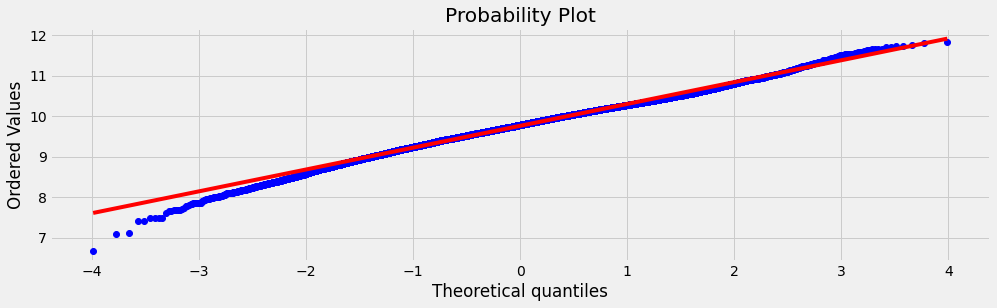

In [ ]:
plt.show()
stats.probplot(np.log1p(train_set[target]),plot= plt )

In [ ]:
train_set['Per Person Price'] = np.log1p(train_set['Per Person Price'])

In [ ]:
#train_set = train_set[train_set['Per Person Price'] >=7.31]


In [ ]:
data =  pd.concat([train_set,test_set],axis=0)
data['source'] = np.nan
data['source'].iloc[:train_set.shape[0]] = "train"
data['source'].iloc[train_set.shape[0]:] = "test"
#data.drop(['Per Person Price'], axis=1, inplace=True)

display(data.shape)

(29994, 16)

In [ ]:
# Missing value

# check the missing value in training data
missing_train = train_set.isnull().sum().sort_values(ascending = False)
missing_train

# No missing value thats good

Per Person Price              0
Cancellation Rules            0
Sightseeing Places Covered    0
Meals                         0
Flight Stops                  0
Airline                       0
Start City                    0
Hotel Details                 0
Travel Date                   0
Places Covered                0
Itinerary                     0
Destination                   0
Package Type                  0
Package Name                  0
Uniq Id                       0
dtype: int64

In [ ]:
numerical_feats = train_set.dtypes[train_set.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_set.dtypes[train_set.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  3
Number of Categorical features:  12


In [ ]:
print(train_set[numerical_feats].columns)
print("*"*100)
print(train_set[categorical_feats].columns)

Index(['Flight Stops', 'Meals', 'Per Person Price'], dtype='object')
****************************************************************************************************
Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')


In [ ]:
# unique value
train_set.nunique()

Uniq Id                       20994
Package Name                   2204
Package Type                      5
Destination                     565
Itinerary                       966
Places Covered                  565
Travel Date                     495
Hotel Details                  6056
Start City                        2
Airline                         310
Flight Stops                      3
Meals                             4
Sightseeing Places Covered     1714
Cancellation Rules               10
Per Person Price              17132
dtype: int64

### **Package Type**

In [ ]:
col = 'Package Type'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 5
Test Unique :  5
Test - Train : 0 -- [set()]


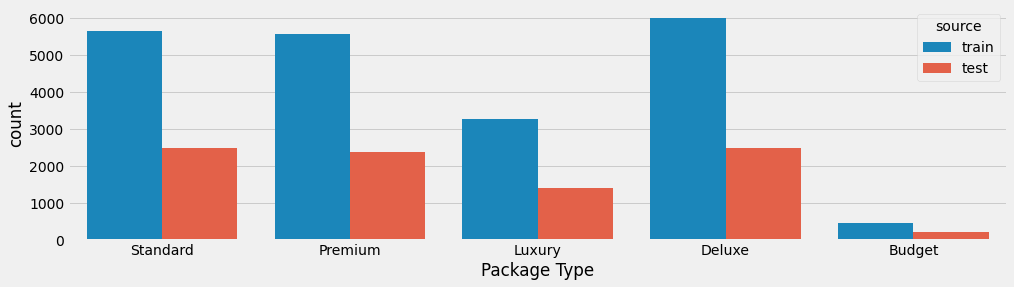

In [ ]:
sns.countplot(data[col],hue = data['source'])

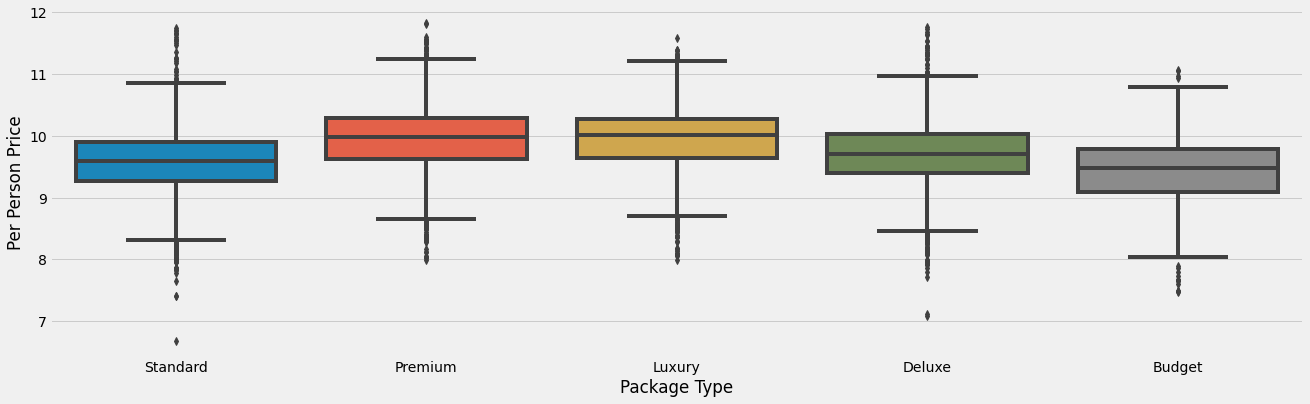

In [ ]:
plt.figure(figsize=(20,6))

box_plot(train_set,col)

**Package Type analysis**

*   Some co-relation with target






### **Start City**

In [ ]:
col = 'Start City'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 2
Test Unique :  2
Test - Train : 0 -- [set()]


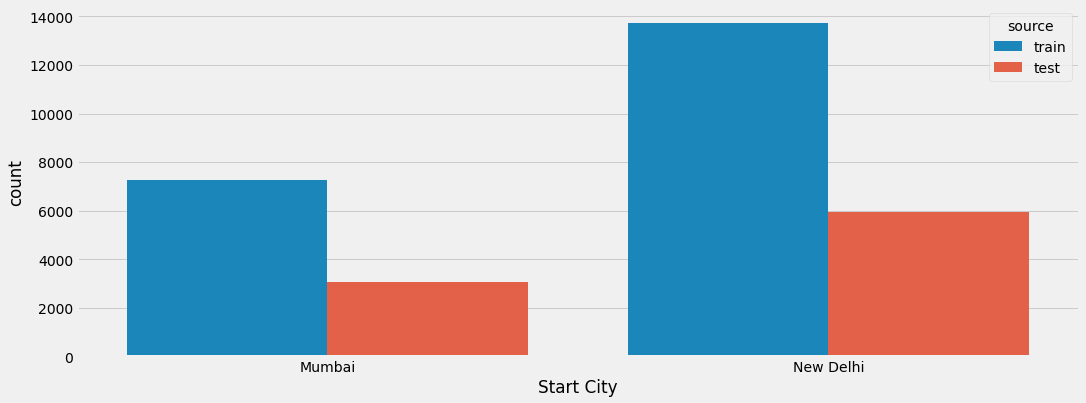

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data[col],hue = data['source'])

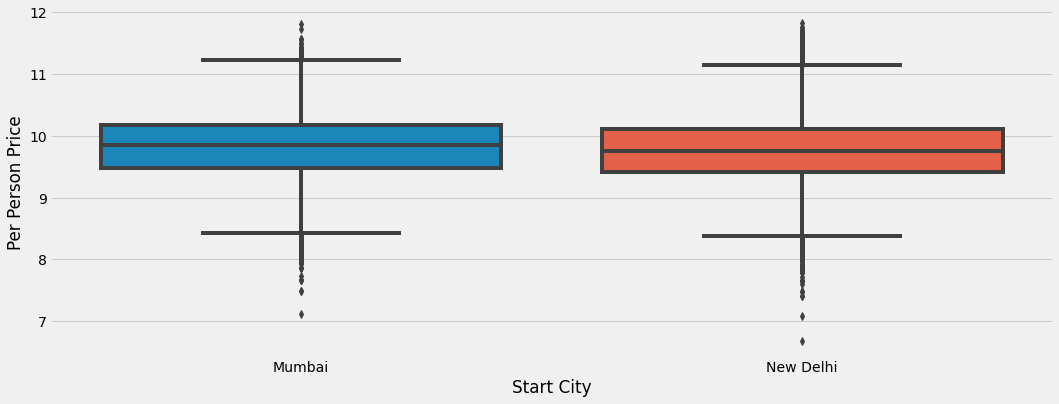

In [ ]:
plt.figure(figsize=(16,6))

box_plot(train_set,col)

**Start City analysis**

1.  Not so much difference can be ignored



### **Meals**

In [ ]:
col ='Meals'


print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 4
Test Unique :  4
Test - Train : 0 -- [set()]


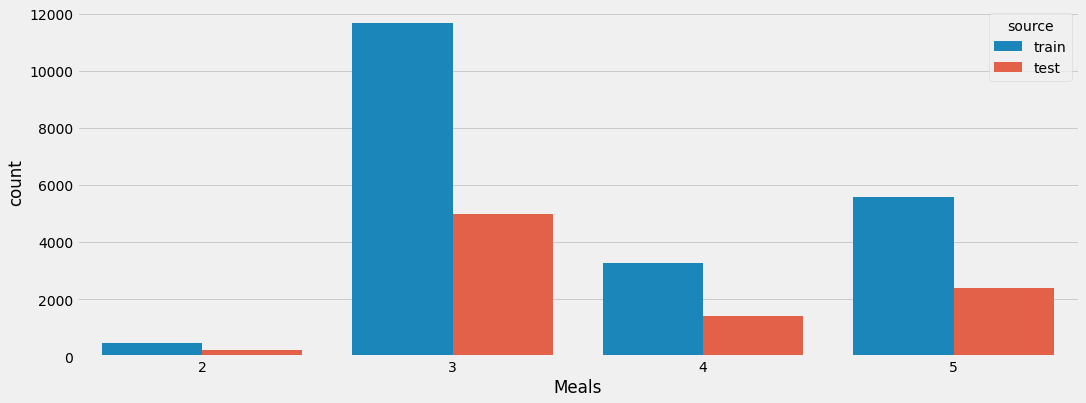

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data[col], hue = data['source'])

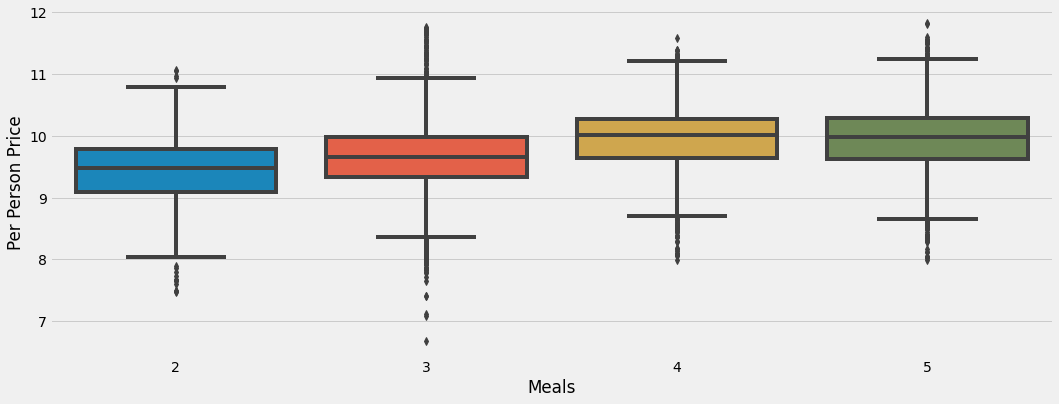

In [ ]:
plt.figure(figsize=(16,6))
box_plot(train_set,col)

**Meals analysis**

1.   Some relatino with target




### **Flight Stops**

In [ ]:
col = 'Flight Stops'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 3
Test Unique :  3
Test - Train : 0 -- [set()]


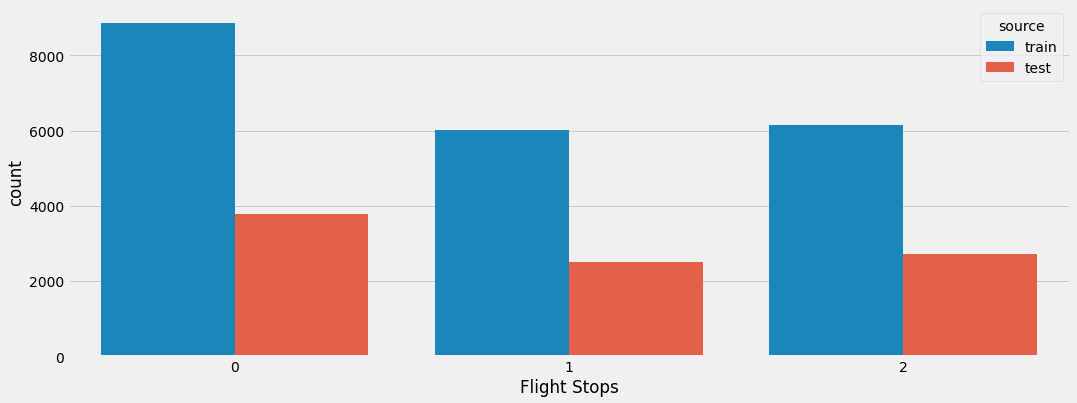

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data[col],hue=data['source'])

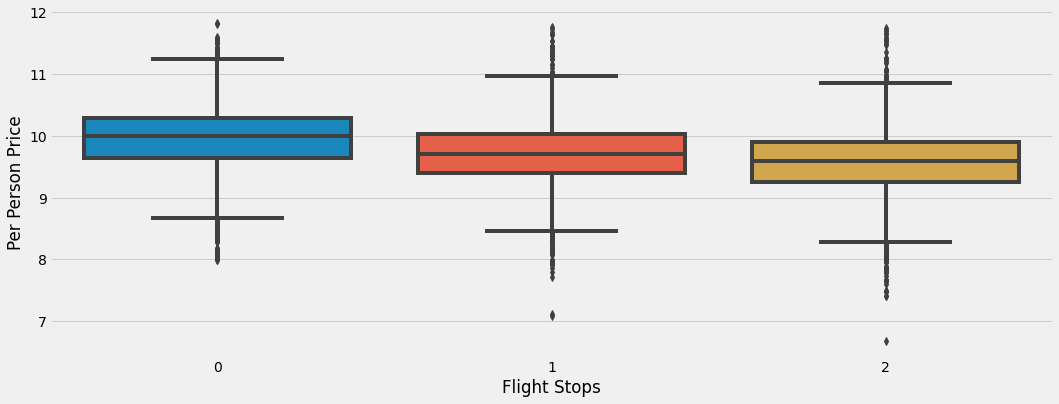

In [ ]:
plt.figure(figsize=(16,6))
box_plot(train_set,col)

**Flight Stops analysis**

1.   No flights stops has higher price than other
  



### **Cancellation Rules**

In [ ]:
col = 'Cancellation Rules'

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train_set[col].nunique(), test_set[col].nunique(),
    len(set(test_set[col].unique()) - set(train_set[col].unique())), set(test_set[col].unique()) - set(train_set[col].unique())
))

Train Unique : 10
Test Unique :  7
Test - Train : 0 -- [set()]


In [ ]:
plt.figure(figsize=(16,6))
train_set[col].value_counts(sort=True)

Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

<Figure size 1152x432 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,6))
test_set[col].value_counts(sort=True)

Cancellation any time after making the 1st payment instalment till the 2nd payment date:The entire amount paid as 1st payment instalment (deposit) would be non-refundable.Cancellation after 2nd payment instalment and before 3rd or final payment date:The total amount that was due at the 2nd payment instalment as per your payment schedule would be non-refundable; anything that you have paid over and above this amount would be refundable.Cancellation after 3rd or final payment date:The full amount paid by you would be non-refundable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

<Figure size 1152x432 with 0 Axes>

 **Cancellation Rules**

1.   Not useful




In [ ]:
data.head(2)

Uniq Id  \
0  e788ab76d9d8cf1e6ed2f139645ca5d1   
1  178f892630ce3e335a5a41d5d83937fd   

                                   Package Name Package Type  \
0  Best of Shimla and Manali Holiday from Delhi     Standard   
1                       Kashmir Valley vacation      Premium   

                          Destination  \
0  New Delhi|Shimla|Manali|Chandigarh   
1          Srinagar|Pahalgam|Srinagar   

                                           Itinerary  \
0  1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...   
1            1N Srinagar . 2N Pahalgam . 1N Srinagar   

                       Places Covered Travel Date  \
0  New Delhi|Shimla|Manali|Chandigarh  30-07-2021   
1          Srinagar|Pahalgam|Srinagar  08-12-2021   

                                       Hotel Details Start City  \
0                                      Not Available     Mumbai   
1  The Orchard Retreat & Spa:4.6|WelcomHotel Pine...  New Delhi   

         Airline  Flight Stops  Meals  \
0  Not Available             2      3   
1  IndiGo|IndiGo             0      5   

                          Sightseeing Places Covered  \
0                                      Not Available   
1   Dal Lake | Avantipura Ruins | Mughal Gardens ...   

                                  Cancellation Rules  Per Person Price source  
0                                      Not Available          9.350972  train  
1  Cancellation any time after making the 1st pay...         10.020670  train

# **Feature enginerring**

In [ ]:
# Destination_count
data['Destination_count']= data['Destination'].str.split('|').apply(lambda x: len(x))

#Itinerary_days
data['Itinerary_holiday_days'] = data['Itinerary'].str.findall('\d{1}')
data['Itinerary_holiday_days']= data['Itinerary_holiday_days'].apply(sumof)


data['Travel Date'] = pd.to_datetime(data['Travel Date'])
data['Year'] = data['Travel Date'].dt.year
data['Month'] = data['Travel Date'].dt.month
data['DayOfMonth'] = data['Travel Date'].dt.day
data['Weekday'] = data['Travel Date'].dt.dayofweek

data['Is_month_end'] = data['Travel Date'].dt.is_month_end 


In [ ]:
#ata.drop(columns=['Package Type Count_x','Package Type Count_y'],inplace=True)

In [ ]:
agg_func = {
    'Itinerary_holiday_days': ['max']    
}
agg_func = data.groupby('Package Type').agg(agg_func)
agg_func.columns = [ 'Package Type' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
data = data.merge(agg_func, on=['Package Type'], how='left')

In [ ]:
data.head()

Uniq Id  \
0  e788ab76d9d8cf1e6ed2f139645ca5d1   
1  178f892630ce3e335a5a41d5d83937fd   
2  f060f2954840503cc2fdaf495357b7df   
3  32a19a6c171e67448f2346da46c619dc   
4  107b068aa0ca03bc6248966f594d105f   

                                   Package Name Package Type  \
0  Best of Shimla and Manali Holiday from Delhi     Standard   
1                       Kashmir Valley vacation      Premium   
2       Might of Mewar- Udaipur and Chittorgarh       Luxury   
3          Colorful Kerala ( Romantic Getaway )      Premium   
4                   A Week In Bangkok & Pattaya      Premium   

                                   Destination  \
0           New Delhi|Shimla|Manali|Chandigarh   
1                   Srinagar|Pahalgam|Srinagar   
2                          Udaipur|Chittorgarh   
3  Munnar|Kumarakom|Allepey|Kovalam and Poovar   
4                              Pattaya|Bangkok   

                                           Itinerary  \
0  1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...   
1            1N Srinagar . 2N Pahalgam . 1N Srinagar   
2                        2N Udaipur . 1N Chittorgarh   
3  2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...   
4                            4N Pattaya . 3N Bangkok   

                                Places Covered Travel Date  \
0           New Delhi|Shimla|Manali|Chandigarh  2021-07-30   
1                   Srinagar|Pahalgam|Srinagar  2021-08-12   
2                          Udaipur|Chittorgarh  2021-04-26   
3  Munnar|Kumarakom|Allepey|Kovalam and Poovar  2021-08-27   
4                              Pattaya|Bangkok  2021-12-12   

                                       Hotel Details Start City  \
0                                      Not Available     Mumbai   
1  The Orchard Retreat & Spa:4.6|WelcomHotel Pine...  New Delhi   
2       The Ananta:4.4|juSTa Lake Nahargarh Palace:4  New Delhi   
3  Elixir Hills Suites Resort & Spa-MMT Holidays ...  New Delhi   
4  Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...  New Delhi   

           Airline  Flight Stops  Meals  \
0    Not Available             2      3   
1    IndiGo|IndiGo             0      5   
2           IndiGo             0      4   
3           IndiGo             0      5   
4  Spicejet|Go Air             0      5   

                          Sightseeing Places Covered  \
0                                      Not Available   
1   Dal Lake | Avantipura Ruins | Mughal Gardens ...   
2   Lake Pichola | Jag Mandir Palace | Saheliyon ...   
3   Mattupetty Dam | Echo Point | Tata Tea Museum...   
4   Coral Island Tour with Indian Lunch, Join Spe...   

                                  Cancellation Rules  Per Person Price source  \
0                                      Not Available          9.350972  train   
1  Cancellation any time after making the 1st pay...         10.020670  train   
2  Cancellation any time after making the 1st pay...          9.427265  train   
3  Cancellation any time after making the 1st pay...         10.490385  train   
4  Cancellation any time after making the 1st pay...         10.149762  train   

   Destination_count  Itinerary_holiday_days  Year  Month  DayOfMonth  \
0                  4                       6  2021      7          30   
1                  3                       4  2021      8          12   
2                  2                       3  2021      4          26   
3                  4                       6  2021      8          27   
4                  2                       7  2021     12          12   

   Weekday  Is_month_end  Package TypeItinerary_holiday_days_min  \
0        4         False                                       1   
1        3         False                                       1   
2        0         False                                       1   
3        4         False                                       1   
4        6         False                                       1   

   Package TypeItinerary_holiday_days_max  
0                  

In [ ]:
df_train = train_set.copy()
df_test = test_set.copy()
df_data = data.copy()


In [ ]:
drop_col = ['source','Travel Date','Uniq Id','Flight Stops','Per Person Price','Month','DayOfMonth','Weekday','Year','Destination_count','Destination']

In [ ]:
#drop_col = ['source','Travel Date','Uniq Id','Per Person Price']
df_data.drop(columns=drop_col,inplace=True) #


In [ ]:
for col in df_data.columns:
  if df_data[col].dtype in (['object','bool']) :
      df_data[col] = df_data[col].astype('category')
      df_data[col] = df_data[col].cat.codes

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29994 entries, 0 to 29993
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Package Name                            29994 non-null  int16
 1   Package Type                            29994 non-null  int8 
 2   Itinerary                               29994 non-null  int16
 3   Places Covered                          29994 non-null  int16
 4   Hotel Details                           29994 non-null  int16
 5   Start City                              29994 non-null  int8 
 6   Airline                                 29994 non-null  int16
 7   Meals                                   29994 non-null  int64
 8   Sightseeing Places Covered              29994 non-null  int16
 9   Cancellation Rules                      29994 non-null  int8 
 10  Itinerary_holiday_days                  29994 non-null  int64
 11  Is_month_end   

In [ ]:
train = df_data[:train_set.shape[0]]
y = train_set[target]
test = df_data[train_set.shape[0]:]

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df_train_ml_sc = rs.fit_transform(train)
#features[:] = rs.fit_transform(features.values)
df_test_ml_sc = rs.transform(test)

In [ ]:
df_scaled = pd.DataFrame(rs.fit_transform(train),columns = train.columns)

In [ ]:
calc_vif(df_scaled)

variables       VIF
0                             Package Name  1.055593
1                             Package Type  3.983617
2                                Itinerary  1.140060
3                           Places Covered  1.141407
4                            Hotel Details  1.015432
5                               Start City  1.339692
6                                  Airline  1.279519
7                                    Meals  1.313466
8               Sightseeing Places Covered  1.026792
9                       Cancellation Rules  1.445897
10                  Itinerary_holiday_days  1.273501
11                            Is_month_end  1.026460
12  Package TypeItinerary_holiday_days_max  4.779057

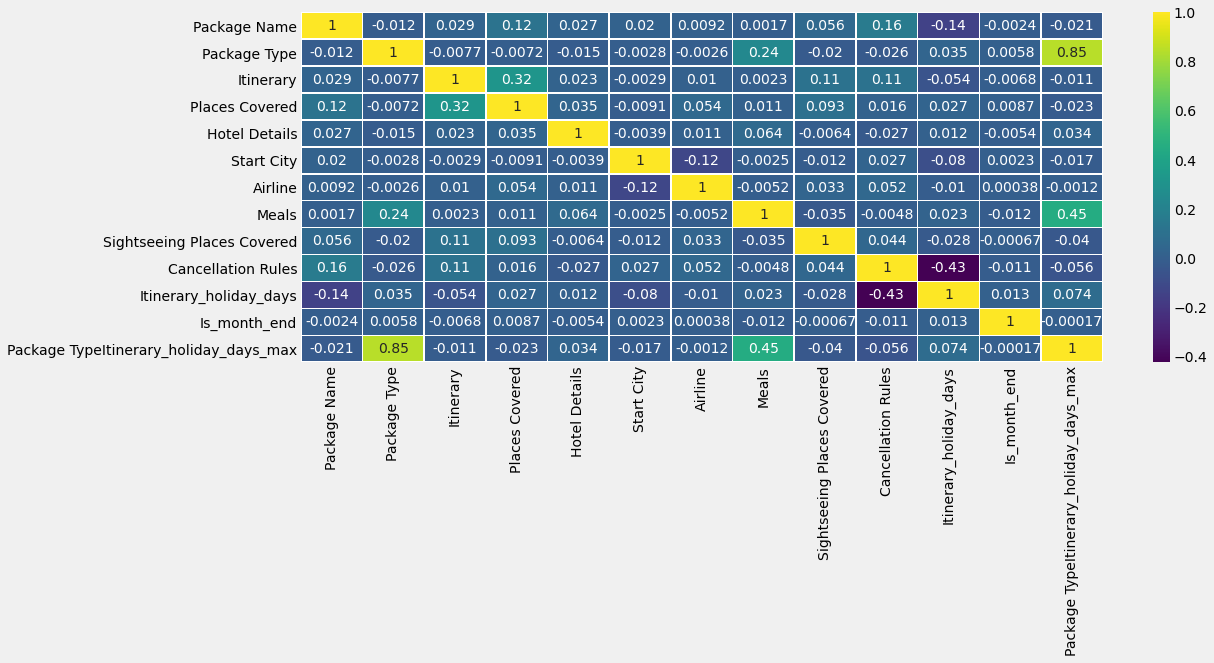

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(train.corr(),annot=True,linewidths=.5,cmap="viridis")

In [ ]:
train.shape,test.shape,y.shape

((20994, 13), (9000, 13), (20994,))

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_train_ml_sc,y,test_size=.30,random_state=113
                                                 ) 

In [ ]:
cat_model = CatBoostRegressor(n_estimators=20000, # use large n_estimators deliberately to make use of the early stopping
                                           
                         random_seed=1994,
                         learning_rate = 0.03,
                         #depth = 6,
                         od_wait=100,
                        
                            eval_metric='RMSE',
                            #random_seed =123,
                           
                            od_type='Iter',
                               
  #                             boosting_type = 'Ordered',
                          subsample = 0.8,
                         #rsm = 0.7,
                         #silent=True,
                         #max_ctr_complexity = 5,  # no of categorical cols combined
#                          boosting_type = 'Ordered',
                          #od_type = 'IncToDec',  #overfitting params
                      #    od_wait = 50,
                         bagging_temperature = .7
                        
                         
                              )
# lr=0.05, no od type of vars -- highest
    
cat_model.fit(X_train,y_train.values,eval_set=(X_test, y_test),
        plot=True,early_stopping_rounds=100,use_best_model=True,verbose=1000)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5318016	test: 0.5343579	best: 0.5343579 (0)	total: 16ms	remaining: 5m 20s
1000:	learn: 0.2038317	test: 0.2128802	best: 0.2128802 (1000)	total: 4.8s	remaining: 1m 31s
2000:	learn: 0.1769941	test: 0.1970333	best: 0.1970333 (2000)	total: 9.81s	remaining: 1m 28s
3000:	learn: 0.1615240	test: 0.1891276	best: 0.1891276 (3000)	total: 15.4s	remaining: 1m 27s
4000:	learn: 0.1504630	test: 0.1841191	best: 0.1841122 (3997)	total: 21.6s	remaining: 1m 26s
5000:	learn: 0.1417685	test: 0.1806232	best: 0.1806232 (5000)	total: 28.6s	remaining: 1m 25s
6000:	learn: 0.1346875	test: 0.1783118	best: 0.1783118 (6000)	total: 35.5s	remaining: 1m 22s
7000:	learn: 0.1288541	test: 0.1767278	best: 0.1767278 (7000)	total: 43.7s	remaining: 1m 21s
8000:	learn: 0.1238053	test: 0.1755083	best: 0.1755069 (7999)	total: 52.1s	remaining: 1m 18s
9000:	learn: 0.1193987	test: 0.1745488	best: 0.1745480 (8998)	total: 1m 2s	remaining: 1m 15s
10000:	learn: 0.1154943	test: 0.1739444	best: 0.1739295 (9981)	total: 1m 11s	r

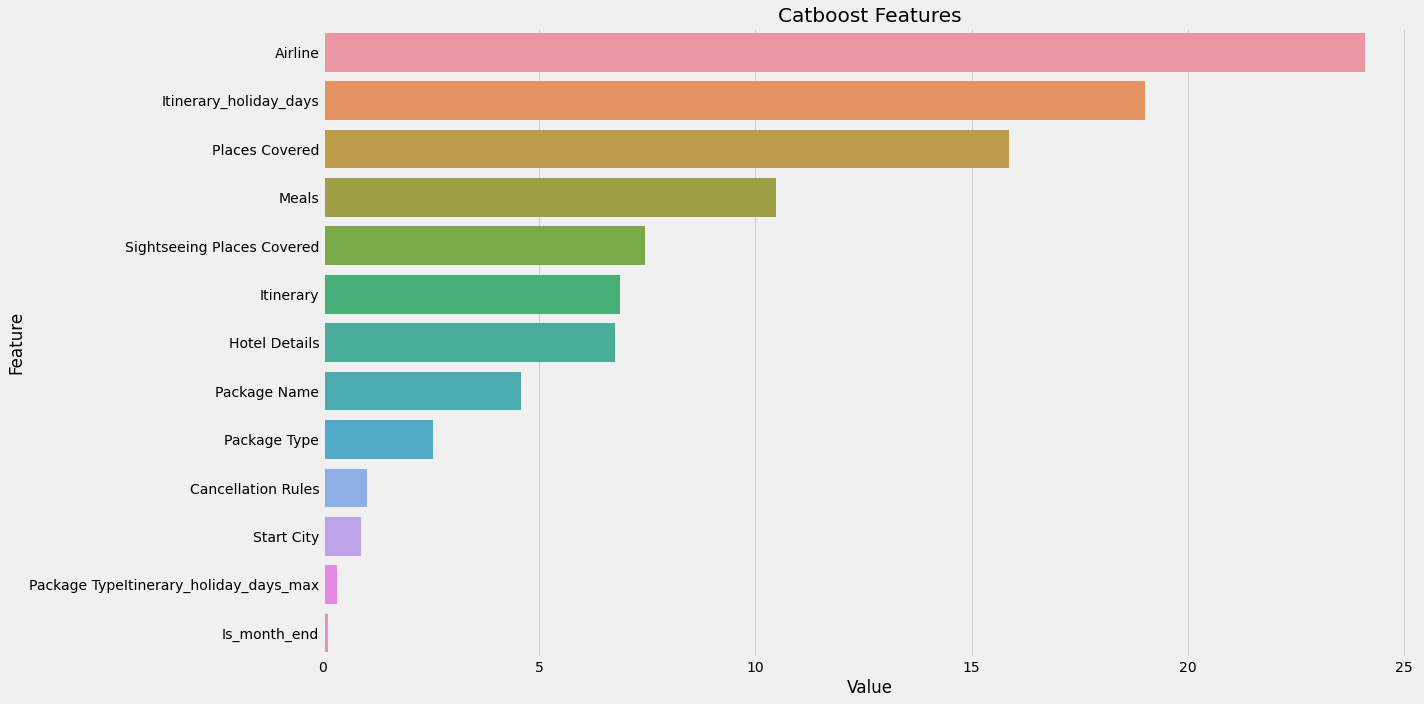

In [ ]:

feature_imp = pd.DataFrame(sorted(zip(cat_model.feature_importances_, train.columns), reverse=True), 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Train R score {cat_model.score(X_train,y_train)}")
print(f"Test R score {cat_model.score(X_test,y_test)}")

Train R score 0.9616413333318108
Test R score 0.8976149408558188


In [ ]:
print(f"Train R score {cat_model.score(X_train,y_train)}")
print(f"Test R score {cat_model.score(X_test,y_test)}")

Train R score 0.9595334423439529
Test R score 0.8942496232168979


In [ ]:
Y_test_pred = (cat_model.predict(X_test))
residuals = (y_test - y_test) 

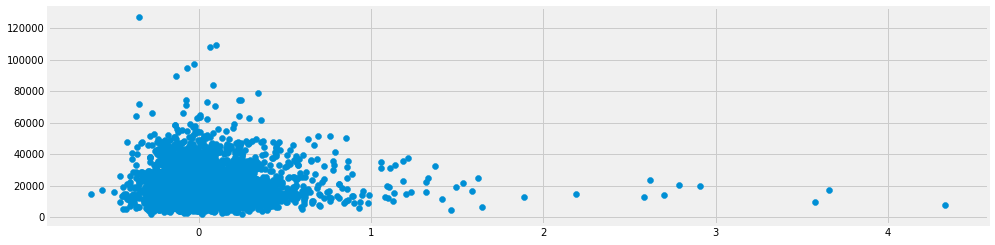

In [ ]:
Y_test_pred = (cat_model.predict(X_test))
residuals = (y_test - Y_test_pred) 
plt.scatter(np.expm1(residuals),np.expm1(Y_test_pred))
plt.show()

In [ ]:
mean_absolute_error(np.expm1(y_test), np.expm1(Y_test_pred))


2653.2023202310356

In [ ]:
mean_squared_error(np.expm1(y_test), np.expm1(Y_test_pred))


22653462.78198747

In [ ]:
np.expm1(y_test).mean(), np.expm1(Y_test_pred).mean()

(19940.49666560813, 19506.91044843431)

In [ ]:
test_cat = cat_model.predict(df_test_ml_sc)

resutl_cat = pd.DataFrame()
#resutl_lgb['customer_id'] = test_set['customer_id']
resutl_cat['Per Person Price'] = np.expm1(test_cat)
resutl_cat.to_csv('cat_mht10.csv', index=False)